In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# corrMatrix = data.corr()

# plt.figure(figsize=(12, 8))

# sns.heatmap(corrMatrix, annot=False)
# plt.show()

In [ ]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
data.interpolate(method='linear',inplace=True)

In [ ]:
data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [ ]:
column=data.columns.tolist()
print(column)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [ ]:
data['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [ ]:
data['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [ ]:
df_logistic = data[['OverallQual','OverallCond','LotFrontage',	'LotArea','GarageArea','TotalBsmtSF','GrLivArea','SalePrice']]

df_logistic

,OverallQual,OverallCond,LotFrontage,LotArea,GarageArea,TotalBsmtSF,GrLivArea,SalePrice
0,7,5,65.0,8450,548,856,1710,208500
1,6,8,80.0,9600,460,1262,1262,181500
2,7,5,68.0,11250,608,920,1786,223500
3,7,5,60.0,9550,642,756,1717,140000
4,8,5,84.0,14260,836,1145,2198,250000
...,...,...,...,...,...,...,...,...
1455,6,5,62.0,7917,460,953,1647,175000
1456,6,6,85.0,13175,500,1542,2073,210000
1457,7,9,66.0,9042,252,1152,2340,266500
1458,5,6,68.0,9717,240,1078,1078,142125


In [ ]:
def map_values(value):
    if value in [1, 2, 3, 4, 5]:
        return 0
    elif value in [6, 7, 8, 9,10]:
        return 1
    else:
        return None

df_logistic['OverallQual'] = df_logistic['OverallQual'].apply(map_values)

df_logistic

<ipython-input-124-75ae1dd2fcbe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logistic['OverallQual'] = df_logistic['OverallQual'].apply(map_values)


,OverallQual,OverallCond,LotFrontage,LotArea,GarageArea,TotalBsmtSF,GrLivArea,SalePrice
0,1,5,65.0,8450,548,856,1710,208500
1,1,8,80.0,9600,460,1262,1262,181500
2,1,5,68.0,11250,608,920,1786,223500
3,1,5,60.0,9550,642,756,1717,140000
4,1,5,84.0,14260,836,1145,2198,250000
...,...,...,...,...,...,...,...,...
1455,1,5,62.0,7917,460,953,1647,175000
1456,1,6,85.0,13175,500,1542,2073,210000
1457,1,9,66.0,9042,252,1152,2340,266500
1458,0,6,68.0,9717,240,1078,1078,142125


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score,log_loss,roc_auc_score,precision_score
import numpy as np

In [ ]:
x=df_logistic[['OverallCond','LotFrontage',	'LotArea','GarageArea','TotalBsmtSF','GrLivArea','SalePrice']]
y=df_logistic['OverallQual']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)

y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, model.predict_proba(X_test))

print('accuracy:', accuracy, '\nprecision:', precision, '\nrecall:', recall, '\nf1:', f1, '\nroc_auc:', roc_auc, '\nlogloss:', logloss)

accuracy: 0.7397260273972602 
precision: 0.7104072398190046 
recall: 0.9289940828402367 
f1: 0.805128205128205 
roc_auc: 0.704334439794102 
logloss: 0.4621969711308522


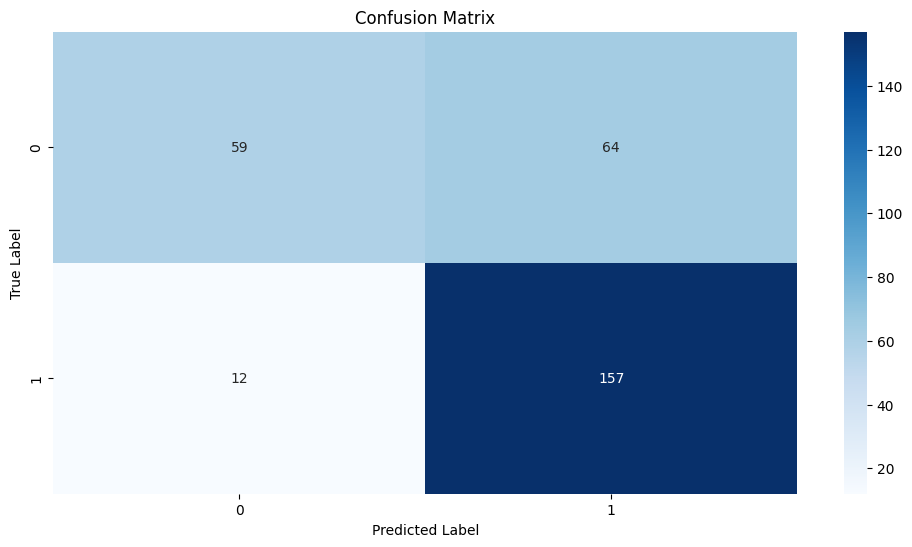

In [ ]:
confusionmatrix=confusion_matrix(y_test,y_pred)
class_label=np.unique(y_test)

plt.figure(figsize=(12,6))
sns.heatmap(confusionmatrix,annot=True,cmap='Blues',fmt='d',xticklabels=class_label,yticklabels=class_label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Saving Model

In [138]:
import pickle

In [141]:
filename = 'logisticRegression_model.sav'
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x=df_logistic[['OverallCond','LotFrontage',	'LotArea','GarageArea','TotalBsmtSF','GrLivArea','SalePrice']]
y=df_logistic['OverallQual']

X_train1,X_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
decisionTree=DecisionTreeClassifier()
decisionTree.fit(X_train1,y_train1)

DecisionTreeClassifier()

In [ ]:
y_pred1=decisionTree.predict(X_test1)

y_pred1

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1])

In [ ]:
accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)
roc_auc = roc_auc_score(y_test1, y_pred1)
logloss = log_loss(y_test1, decisionTree.predict_proba(X_test1))

print('accuracy:', accuracy, '\nprecision:', precision, '\nrecall:', recall, '\nf1:', f1, '\nroc_auc:', roc_auc, '\nlogloss:', logloss)

accuracy: 0.7945205479452054 
precision: 0.8114285714285714 
recall: 0.8402366863905325 
f1: 0.8255813953488372 
roc_auc: 0.7859720017318516 
logloss: 7.4062301484487305


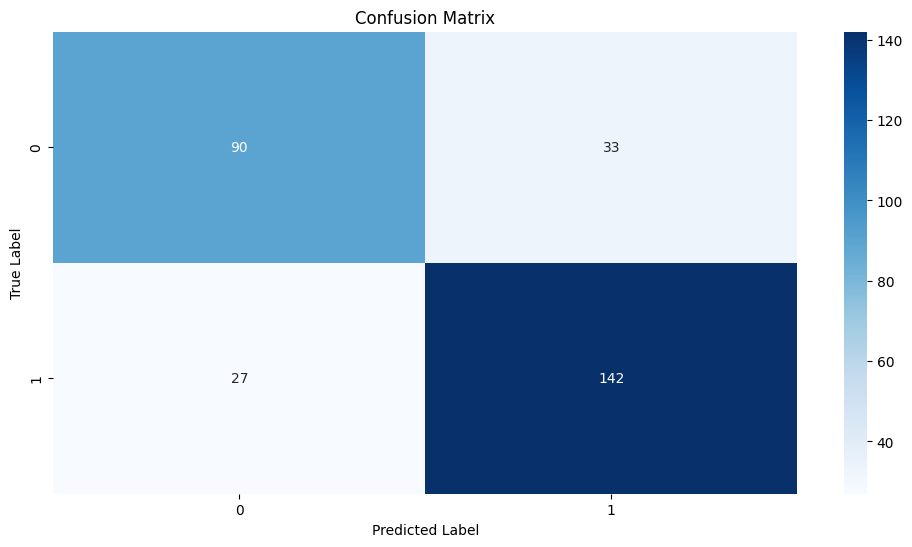

In [ ]:
confusionmatrix=confusion_matrix(y_test1,y_pred1)
class_label=np.unique(y_test1)

plt.figure(figsize=(12,6))
sns.heatmap(confusionmatrix,annot=True,cmap='Blues',fmt='d',xticklabels=class_label,yticklabels=class_label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()